# Imports

In [1]:
import sys

stdout = sys.stdout

import htsexperimentation as htsx
import tsaugmentation as tsag
import properscoring as ps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sys.stdout = stdout
sns.set()
plt.rcParams.update({'font.size': 22})

# Parameters

In [32]:
datasets=['prison', 'tourism']
algorithms=[
            "gpf",
            "mint",
            "deepar",
            "standard_gp_lin",
            "standard_gp_pie",
            "standard_gp_zer",
            "ets_bu",
            "arima_bu"
        ]

# Loading data
dataset = 'tourism'
data = tsag.preprocessing.PreprocessDatasets(dataset).apply_preprocess()
true = data['predict']['data'].reshape((data['predict']['s'], data['predict']['n'])).T

Number of groups: 4
	state: 7
	zone: 27
	region: 76
	purpose: 4
Total number of series: 304
Number of points per series for train: 204
Total number of points: 228
Seasonality: 12
Forecast horizon: 24


# Calculation of CRPS - example for a single series

### GPF

In [33]:
e = htsx.compute_results.get_output(dataset, 'gpf', 'jitter')
series = 9
plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')
plt.legend();

KeyError: 'predictions'

In [34]:
ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

KeyError: 'predictions'

### MinT

In [35]:
e

{'mase': {'bottom_ind': array([0.661, 0.639, 0.98 , 0.971, 1.156, 0.764, 1.119, 1.145, 0.737,
         0.577, 0.723, 0.807, 0.863, 0.637, 1.056, 1.096, 0.885, 0.88 ,
         0.958, 1.096, 0.865, 0.624, 1.016, 0.717, 0.633, 1.043, 0.982,
         1.069, 0.804, 0.71 , 0.846, 0.739, 0.892, 0.84 , 1.003, 1.1  ,
         0.672, 0.586, 0.893, 0.931, 0.835, 0.644, 0.908, 0.76 , 0.697,
         0.708, 1.2  , 1.295, 0.793, 0.599, 1.24 , 1.241, 0.93 , 0.648,
         0.577, 0.934, 0.568, 0.721, 0.784, 0.539, 1.069, 0.787, 0.908,
         0.97 , 0.983, 0.793, 1.026, 1.361, 1.271, 0.806, 1.444, 1.728,
         0.702, 0.881, 1.199, 1.169, 0.813, 0.654, 0.88 , 0.775, 0.79 ,
         0.798, 1.575, 0.87 , 0.694, 0.823, 0.924, 1.447, 0.911, 0.56 ,
         1.313, 1.163, 1.036, 0.696, 1.088, 0.826, 0.55 , 0.982, 1.231,
         1.128, 0.701, 0.832, 0.88 , 1.085, 0.941, 0.834, 1.282, 0.907,
         0.878, 0.834, 0.894, 1.652, 0.799, 0.833, 0.743, 1.257, 1.075,
         1.017, 1.254, 1.793, 0.745, 0.583

In [46]:
data['train']

{'groups_idx': {'state': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
  

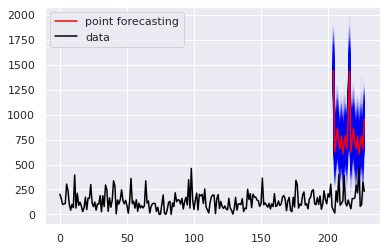

In [36]:
e = htsx.compute_results.get_output(dataset, 'mint', 'jitter')
series = 3
plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')

plt.legend();

In [37]:
ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

535.7681674965953

### DeepAR

ValueError: x and y must have same first dimension, but have shapes (0,) and (24, 500)

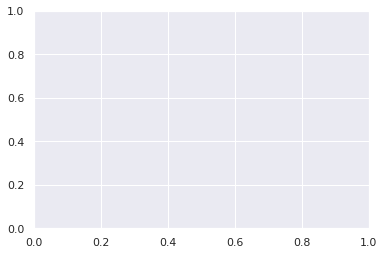

In [38]:
e = htsx.compute_results.get_output(dataset, 'deepar', 'jitter')
series = 9
plt.plot(np.arange(data['train']['n'], data['train']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(data['train']['n'], data['train']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')
plt.legend();

In [ ]:
ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

# Calculation of MASE for each algorithm

In [ ]:
htsx.visualization.plot_compare_err_metric('mase', 'tourism')

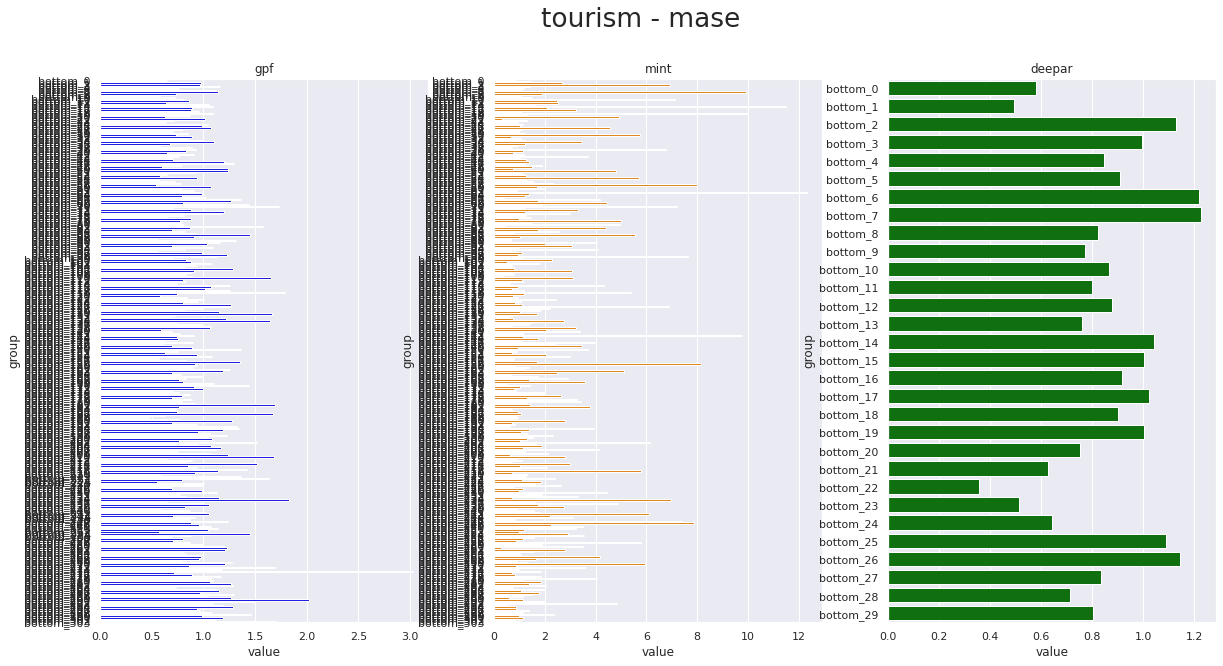

In [39]:
htsx.visualization.plot_compare_err_metric('mase', 'tourism')

# Calculating aggregate results for all algorithms

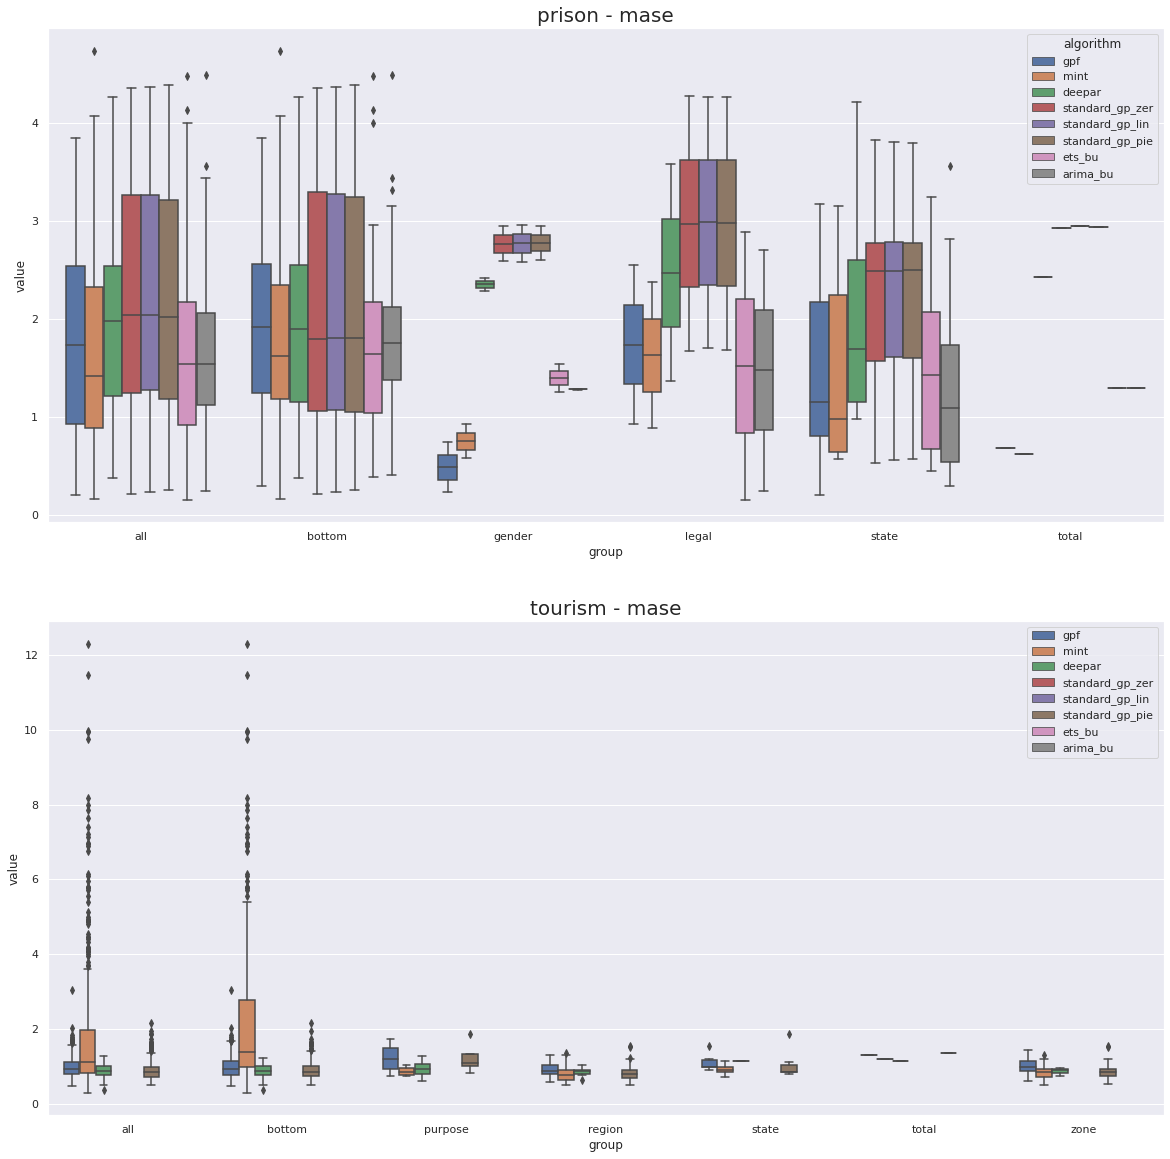

In [40]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 
                                                                       algorithms, 
                                                                       'mase')
htsx.visualization.boxplot_error(df_orig_list, 'mase', datasets)

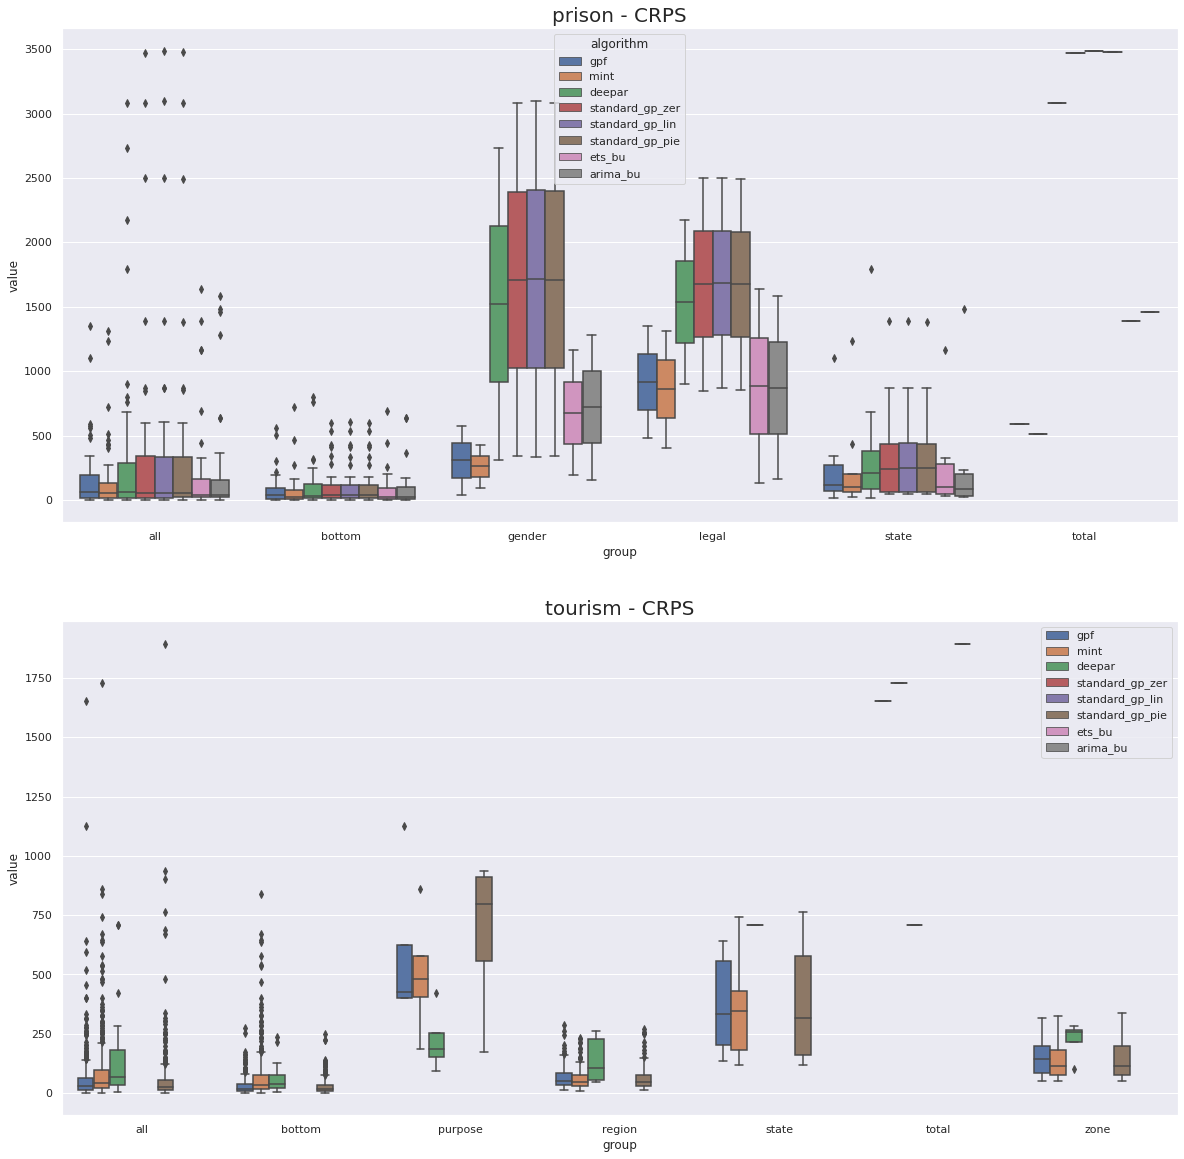

In [41]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 
                                                                       algorithms, 
                                                                       'CRPS')
htsx.visualization.boxplot_error(df_orig_list, 'CRPS', datasets)